In [70]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import numpy as np
from pathlib import Path

from post.files import parse_metrics_log, parse_job_log
from post.plots import get_figa, plot_metrics, make_axis_great_again, plot_epochs

In [72]:
tesi_folder = Path('~/Scuola/now/thesis').expanduser()
milestones = tesi_folder / 'milestones'
current_milestone = milestones / '29.04_06.05_scaling-up'

= found 40 / 40 training / validation epochs
- plotted metrics [11.7, 17.7] in epochs [0, 39]
- plotted metrics [23.7, 26.5] in epochs [0, 39]
= found 43 / 43 training / validation epochs
- plotted metrics [11.1, 15.1] in epochs [0, 42]
- plotted metrics [23.3, 27.5] in epochs [0, 42]


Text(0.5, 0.98, 'Algebraic, PRE-TRAINED BB (optimizing just alg_confidences, deconv_layers and final_layer), lr=1e-6 on 11872 / 703 images ~ 384 x 384 pixels')

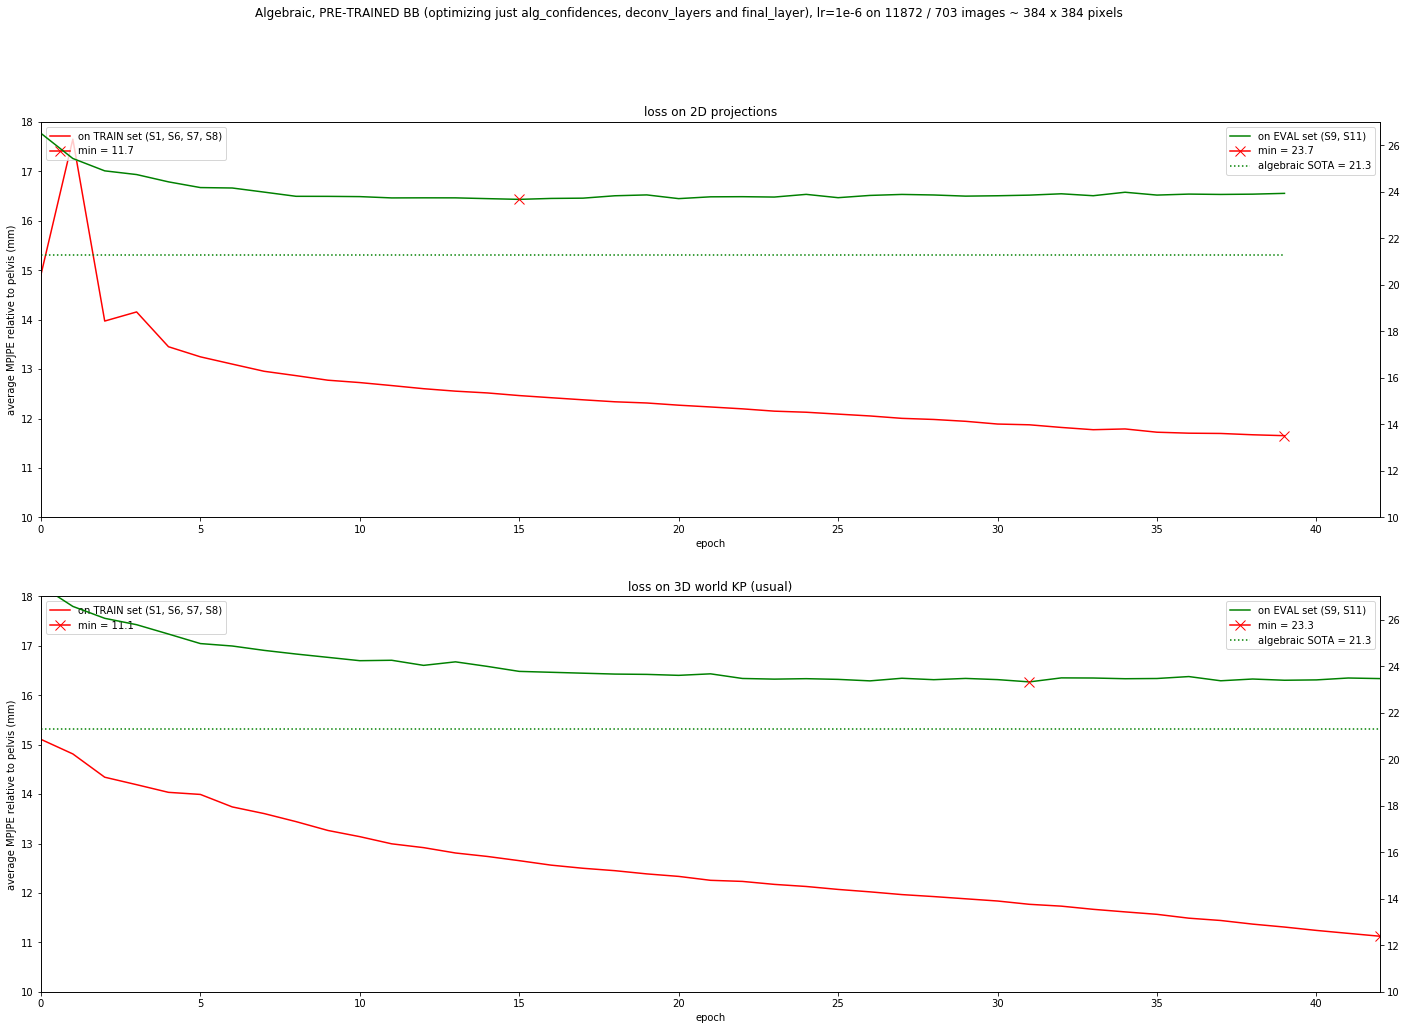

In [75]:
fig, axis = get_figa(2, 1, heigth=8, width=24)

train_ylim = [10, 18]
eval_ylim = [10, 27]

train_metrics, eval_metrics = parse_metrics_log(current_milestone / '2d.txt')
ax = axis.ravel()[0]
plot_metrics(ax, train_metrics, eval_metrics, train_ylim=train_ylim, eval_ylim=eval_ylim)
make_axis_great_again(
    ax,
    title='loss on 2D projections',
    left_title='average MPJPE relative to pelvis (mm)',
    xlim=[0, 42],
    ylim=train_ylim
)
ax.grid(False)

train_metrics, eval_metrics = parse_metrics_log(current_milestone / '3d.txt')
ax = axis.ravel()[1]
plot_metrics(ax, train_metrics, eval_metrics, train_ylim=train_ylim, eval_ylim=eval_ylim)
make_axis_great_again(
    ax,
    title='loss on 3D world KP (usual)',
    left_title='average MPJPE relative to pelvis (mm)',
    xlim=[0, 42],
    ylim=train_ylim
)
ax.grid(False)

fig.suptitle('Algebraic, PRE-TRAINED BB (optimizing just alg_confidences, deconv_layers and final_layer), lr=1e-6 on 11872 / 703 images ~ 384 x 384 pixels')
# long_optim_2d_VS_3d.png

human36m_alg_AlgebraicTriangulationNet@03.05.2021-15:13:08 correctly parsed
training on 12, evaluating on 5
found 1000 epochs
training loss in [0.4, 1434.3]
training metrics in [204.1, 12864177.3]
eval metrics in [7174.4, 8547711.2]
- plotted metrics [0.4, 1434.3] in epochs [0, 999]
- plotted metrics [204.1, 12864177.3] in epochs [0, 999]
- plotted metrics [7174.4, 8547711.2] in epochs [0, 999]
human36m_alg_AlgebraicTriangulationNet@03.05.2021-10:30:57 correctly parsed
training on 12, evaluating on 5
found 1000 epochs
training loss in [0.1, 36.7]
training metrics in [25.2, 766050.7]
eval metrics in [274.5, 585949.1]
- plotted metrics [0.1, 36.7] in epochs [0, 999]
- plotted metrics [25.2, 766050.7] in epochs [0, 999]
- plotted metrics [274.5, 585949.1] in epochs [0, 999]


Text(0.5, 0.98, 'cam2cam estimation (12 training / 5 validation images), optimizing just last 3 layers of BB, lr BB=1e-6, lr cam2cam=1e-4')

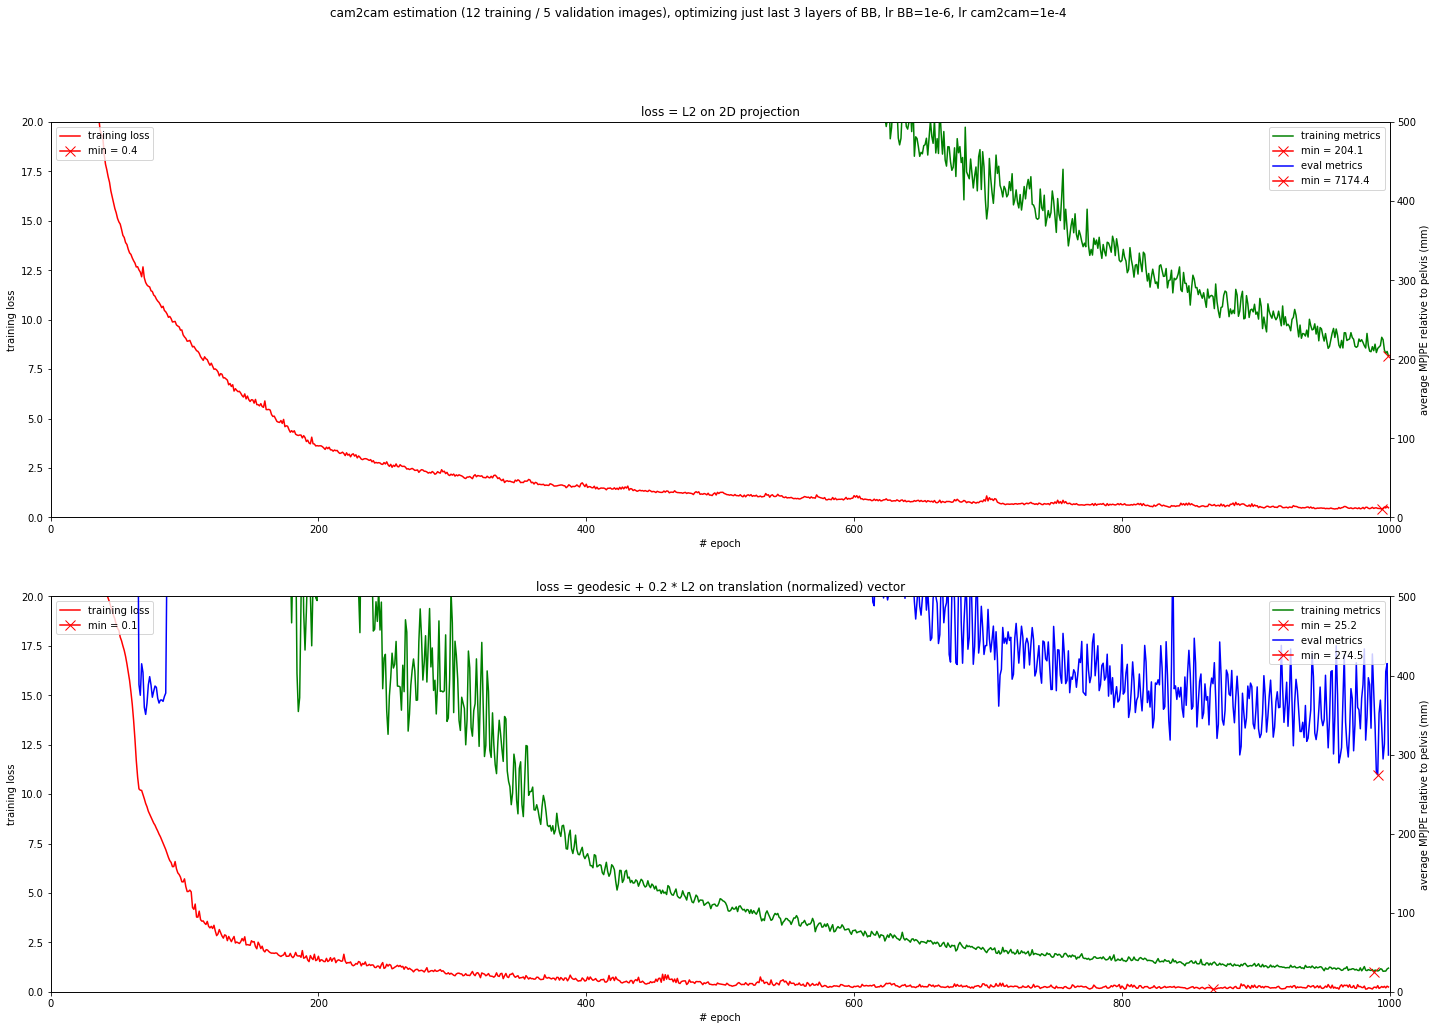

In [129]:
fig, axis = get_figa(2, 1, heigth=8, width=24)

exp_name, train_data_amount, eval_data_amount, epochs = parse_job_log(current_milestone / '.out')
ax = axis.ravel()[0]
plot_epochs(
    ax, epochs,
    train_metric_ylim=[0, 500],
    eval_metric_ylim=[0, 500],
    loss_ylim=[0, 20],
    title='loss = L2 on 2D projection',
    metric_ylabel='average MPJPE relative to pelvis (mm)'
)
ax.set_xlim([0, 1000])


exp_name, train_data_amount, eval_data_amount, epochs = parse_job_log(current_milestone / '14794130.out')
ax = axis.ravel()[1]
plot_epochs(
    ax, epochs,
    train_metric_ylim=[0, 500],
    eval_metric_ylim=[0, 500],
    loss_ylim=[0, 20],
    title='loss = geodesic + 0.2 * L2 on translation (normalized) vector',
    metric_ylabel='average MPJPE relative to pelvis (mm)'
)
ax.set_xlim([0, 1000])

fig.suptitle('cam2cam estimation (12 training / 5 validation images), optimizing just last 3 layers of BB, lr BB=1e-6, lr cam2cam=1e-4')
# cam2cam_proj_VS_geo_loss.png

human36m_alg_AlgebraicTriangulationNet@02.05.2021-12:10:53 correctly parsed
training on 11872, evaluating on 703
found 36 epochs
training loss in [697.2, 2112.2]
training metrics in [11.1, 14.8]
eval metrics in [23.3, 26.2]
- plotted metrics [697.2, 2112.2] in epochs [0, 35]
- plotted metrics [11.1, 14.8] in epochs [0, 35]
- plotted metrics [23.3, 26.2] in epochs [0, 35]
human36m_alg_AlgebraicTriangulationNet@02.05.2021-12:08:50 correctly parsed
training on 11872, evaluating on 703
found 40 epochs
training loss in [88721.5, 243833.4]
training metrics in [11.4, 14.7]
eval metrics in [23.5, 25.9]
- plotted metrics [88721.5, 243833.4] in epochs [0, 39]
- plotted metrics [11.4, 14.7] in epochs [0, 39]
- plotted metrics [23.5, 25.9] in epochs [0, 39]


Text(0.5, 0.98, 'DLT in cam, PRE-TRAINED BB (optimizing just alg_confidences, deconv_layers and final_layer), lr=1e-6 on 11872 / 703 images ~ 384 x 384 pixels')

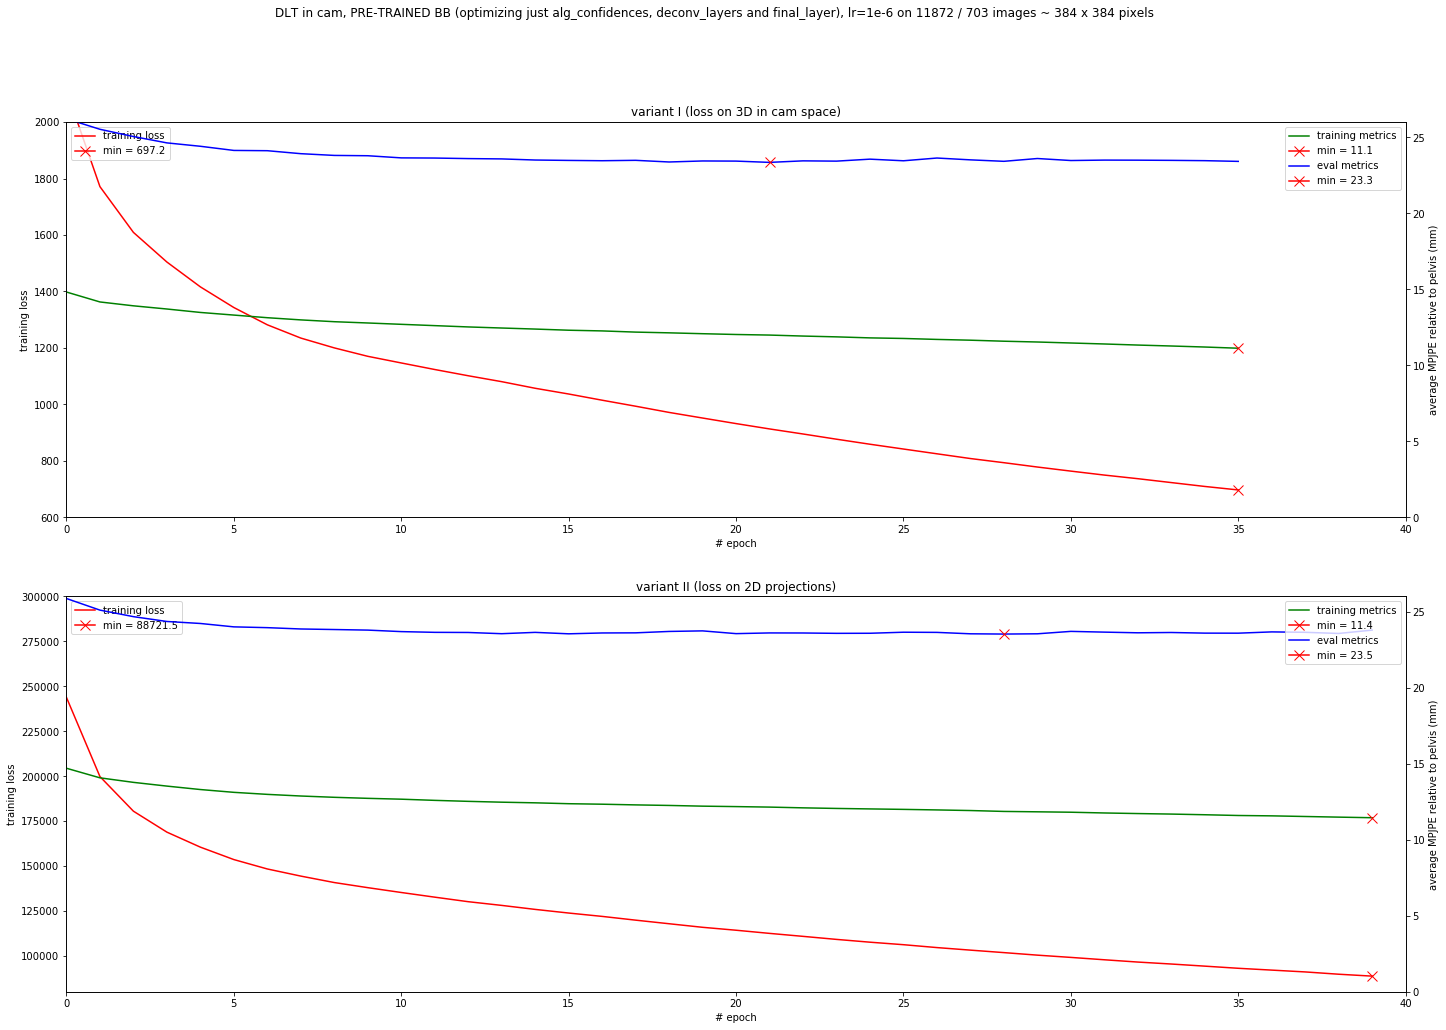

In [120]:
fig, axis = get_figa(2, 1, heigth=8, width=24)

exp_name, train_data_amount, eval_data_amount, epochs = parse_job_log(current_milestone / '14723512.out')
ax = axis.ravel()[0]
plot_epochs(
    ax, epochs,
    train_metric_ylim=[0, 26],
    eval_metric_ylim=[0, 26],
    loss_ylim=[600, 2000],
    title='variant I (loss on 3D in cam space)',
    metric_ylabel='average MPJPE relative to pelvis (mm)'
)
ax.set_xlim([0, 40])

exp_name, train_data_amount, eval_data_amount, epochs = parse_job_log(current_milestone / '14723482.out')
ax = axis.ravel()[1]
plot_epochs(
    ax, epochs,
    train_metric_ylim=[0, 26],
    eval_metric_ylim=[0, 26],
    loss_ylim=[80_000, 300_000],
    title='variant II (loss on 2D projections)',
    metric_ylabel='average MPJPE relative to pelvis (mm)'
)
ax.set_xlim([0, 40])

fig.suptitle('DLT in cam, PRE-TRAINED BB (optimizing just alg_confidences, deconv_layers and final_layer), lr=1e-6 on 11872 / 703 images ~ 384 x 384 pixels')
# dlt_in_cam_VI_VS_VII.png